# Vibração Livre de um Sistema de Um Grau de Liberdade

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

## Sistema Massa-Mola

![](figuras/fig2-1.png)

$F_m = -k x$

$F_m = m a$

$-k x = m \ddot{x}$

**Equação Diferencial de Movimento:**

$m \ddot{x} + k x = 0 $

$C.I. \rightarrow \left\{ \begin{array} x(0) = x_0 \\ \dot{x}(0) = v_0 \end{array} \right.$


Resolvendo esta EDO...

In [1]:
from sympy import *

In [2]:
t = symbols('t')
m,k = symbols('m k',positive = True)
x0,v0 = symbols('x0 v0')
x = Function('x')(t)

In [3]:
EDM = Eq(m*x.diff(t,2) + k*x,0)
EDM

Eq(k*x(t) + m*Derivative(x(t), (t, 2)), 0)

In [4]:
x0,v0 = symbols('x0 v0')

In [5]:
sol = dsolve(EDM)
sol

Eq(x(t), C1*sin(sqrt(k)*t/sqrt(m)) + C2*cos(sqrt(k)*t/sqrt(m)))

**Define-se:**

$\omega_n = \sqrt{\dfrac{k}{m}}$

Onde $\omega_n$ é chamado de **pulsação natural** ou **frequência circular natural não amortecida**.

In [6]:
omega_n = symbols('omega_n')
sol = sol.subs(sqrt(k/m),omega_n)
sol

Eq(x(t), C1*sin(omega_n*t) + C2*cos(omega_n*t))

Para encontrarmos os valores de $C_1$ e $C_2$ usaremos as **condições iniciais**:

$x(0) = x_0$

$\dot{x}(0) = v_0$

In [7]:
CI_1 = Eq(x0,sol.rhs.subs(t,0))
CI_1

Eq(x0, C2)

In [8]:
sol = sol.subs('C2',x0)
sol

Eq(x(t), C1*sin(omega_n*t) + x0*cos(omega_n*t))

In [9]:
x_ponto = sol.rhs.diff(t)
Eq(x.diff(t),x_ponto)

Eq(Derivative(x(t), t), C1*omega_n*cos(omega_n*t) - omega_n*x0*sin(omega_n*t))

In [10]:
CI_2 = Eq(v0,x_ponto.subs(t,0))
CI_2

Eq(v0, C1*omega_n)

In [11]:
C1 = solve(CI_2,'C1')[0]

In [12]:
sol = sol.subs('C1',C1)
sol

Eq(x(t), x0*cos(omega_n*t) + v0*sin(omega_n*t)/omega_n)

De modo alternativo, é possível já inserir as condições iniciais no comando ``dsolve`` :

In [13]:
sol = dsolve(EDM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})
sol

Eq(x(t), x0*cos(sqrt(k)*t/sqrt(m)) + sqrt(m)*v0*sin(sqrt(k)*t/sqrt(m))/sqrt(k))

In [14]:
sol = sol.subs({sqrt(m/k):1/omega_n,sqrt(k/m):omega_n})
sol

Eq(x(t), x0*cos(omega_n*t) + v0*sin(omega_n*t)/omega_n)

Logo, com esta equação, podemos obter a resposta, $x(t)$, do sistema para qualquer instante de tempo. 

$x{\left(t \right)} = x_{0} \cos{\left(\omega_{n} t \right)} + \frac{v_{0} \sin{\left(\omega_{n} t \right)}}{\omega_{n}}$

Podemos escrever esta equação de outra forma: 

$x(t) = X_0 sen(\omega_n t + \phi)$

onde, $X_0 = \sqrt{x_0^2 + \left(\dfrac{v_0}{\omega_n} \right)^2}$

e $tg \phi = \dfrac{\omega_n x_0}{v_0}$

**Observação:**

Utilizando $\omega_n = \sqrt{\dfrac{k}{m}}$ podemos reescrever a equação de movimento como: 

$\ddot{x} + \omega_n^2 x = 0 $

## Obtenção das Equações de Movimento pelo Método de Lagrange para Sistemas Conservativos

**Coordenadas Generalizadas:**

A determinação da configuração do sistema se faz por meio de um conjunto de funções escalares do tempo, $q_1(t)$, $q_2(t)$, $q_n(t)$ denominadas coordenadas generalizadas. 

Energia Cinética $\rightarrow$ $T$

![](figuras/fig2-2.png)
![](figuras/fig2-3.png)

Energia Potencial $\rightarrow$ $U$

![](figuras/fig2-4.png)

**Lagrangeano:**

$\mathscr{L} = T - U$

Equação de Lagrange para sistemas consevativos:

$\dfrac{d}{dt}\left( \dfrac{\partial \mathscr{L}}{\partial \dot{q}_i}\right) - \dfrac{\partial \mathscr{L}}{\partial q_i} = 0 \qquad i = 1,2,...,n$

### Exemplo 1:

Obtenha a frequência angular, $\omega_n$ do seguinte sistema mecânico e um gráfico do deslocamento em função do tempo para as seguintes condições iniciais: $\theta(0) = \pi/6$ e $\dot{\theta}(0) = 0$.

Dados: 

Raio = 0.2m

Massa do bloco = 0.5kg

Massa do disco = 0.5kg

Rigidez da mola = 1000N/m

![](figuras/fig2-5.png)

In [15]:
m,I,k,R = symbols('m I k R',positive = True)
t = symbols('t')
theta = Function('theta')(t)

Considerando que:

$x = R \theta$

In [16]:
T = m*(R*theta.diff(t))**2/2 + I*(theta.diff(t))**2/2
Eq(symbols('T'),T)

Eq(T, I*Derivative(theta(t), t)**2/2 + R**2*m*Derivative(theta(t), t)**2/2)

In [17]:
U = k*(R*theta)**2/2
Eq(symbols('U'),U)

Eq(U, R**2*k*theta(t)**2/2)

In [18]:
L = T - U
Eq(symbols('L'),L)

Eq(L, I*Derivative(theta(t), t)**2/2 - R**2*k*theta(t)**2/2 + R**2*m*Derivative(theta(t), t)**2/2)

In [19]:
EDM = Eq((L.diff(theta.diff(t))).diff(t) - L.diff(theta),0)
EDM

Eq(I*Derivative(theta(t), (t, 2)) + R**2*k*theta(t) + R**2*m*Derivative(theta(t), (t, 2)), 0)

In [20]:
Eq(theta.diff(t,2),solve(EDM,theta.diff(t,2))[0])

Eq(Derivative(theta(t), (t, 2)), -R**2*k*theta(t)/(I + R**2*m))

Logo, observa-se que:

$\omega_n = \sqrt{\frac{R^{2} k }{I + R^{2} m}}$

Resolvendo a EDO de segunda ordem: 

In [21]:
sol = dsolve(EDM)
dsolve(EDM)

Eq(theta(t), C1*sin(R*sqrt(k)*t/sqrt(I + R**2*m)) + C2*cos(R*sqrt(k)*t/sqrt(I + R**2*m)))

In [22]:
omega_n = symbols('omega_n')
sol.subs(R*sqrt(k/(I+R**2*m)),omega_n)

Eq(theta(t), C1*sin(omega_n*t) + C2*cos(omega_n*t))

Temos que: $\theta(0) = \pi/6$ e $\dot{\theta}(0) = 0$

In [23]:
CI_1 = Eq(pi/6,sol.rhs.subs(t,0))
CI_1

Eq(pi/6, C2)

In [24]:
sol = sol.subs('C2',pi/6)
sol

Eq(theta(t), C1*sin(R*sqrt(k)*t/sqrt(I + R**2*m)) + pi*cos(R*sqrt(k)*t/sqrt(I + R**2*m))/6)

In [25]:
CI_2 = Eq(0,sol.rhs.diff(t).subs(t,0))
CI_2

Eq(0, C1*R*sqrt(k)/sqrt(I + R**2*m))

In [26]:
sol = sol.subs('C1',0)
sol

Eq(theta(t), pi*cos(R*sqrt(k)*t/sqrt(I + R**2*m))/6)

In [27]:
dados = {R:0.2,m:0.5,I:0.5*0.2**2/2,k:1000}

In [28]:
theta_t = sol.rhs.subs(dados)
Eq(Function('theta')(t),theta_t)

Eq(theta(t), pi*cos(11.5470053837925*sqrt(10)*t)/6)

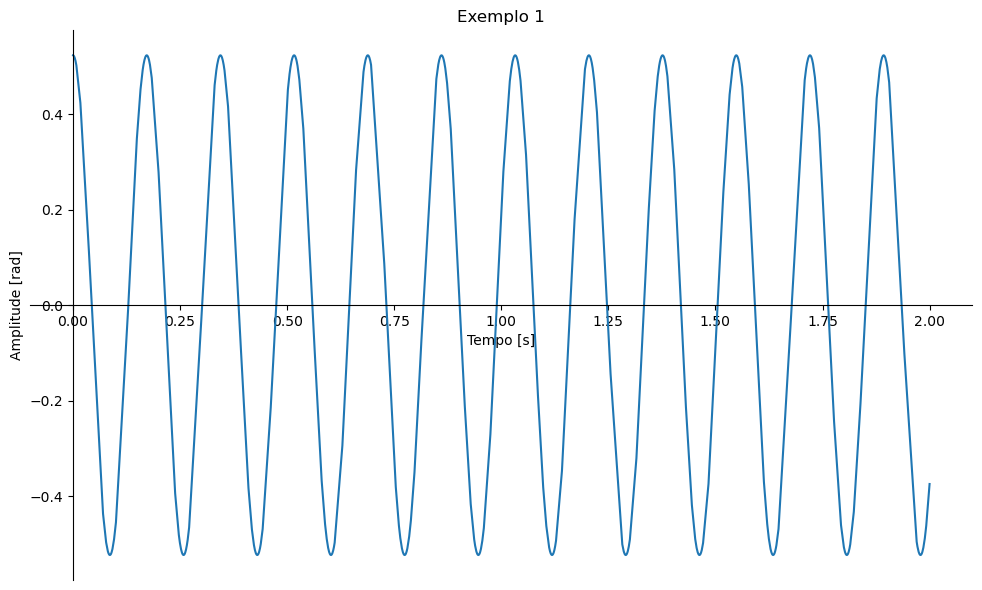

In [29]:
plt = plot(theta_t,(t,0,2),show=False)
plt.size = (10,6)
plt.title = 'Exemplo 1'
plt.xlabel = 'Tempo [s]'
plt.ylabel = 'Amplitude [rad]'
plt.show()

## Massa Equivalente e Rigidez Equivalente

De modo geral, para todo sistema conservativo de 1 GDL em vibração livre podemos modelá-lo da seguinte maneira: 

$m_{eq} \ddot{q}_1 + k_{eq} q = 0$

No exemplo anterior obtivemos a seguinte equação de movimento: 

$(R^2m + I) \ddot{\theta} + R^2 k \theta = 0$

Deste modo, observa-se que:

$m_{eq} = R^2m + I$

$k_{eq} = R^2 k$ 

Observa-se que:

$\omega_n = \sqrt{\dfrac{k_{eq}}{m_{eq}}}$

### Exemplo 2:

Obtenha a frequência natural de um disco soldado a um eixo flexível engastado. Obtenha uma expressão para o deslocamento angular $\theta$ do disco em função do tempo, considere como codição inicial uma velocidade $\dot{\theta}(t) = \omega_0$. 

### Associação de Molas

* Em paralelo: 

![](figuras/fig2-6.png)

$F_{M_1} = - k_1 (x_1 - x_2)$

$F_{M_2} = - k_2 (x_1 - x_2) $

$F_M = F_{M_1} F_{M_2} \rightarrow F_M = k_1(x_2 - x_1) + k_2(x_2 - x_1)$

$F_M = (k_1 + k_2)(x_2 - x_1) \rightarrow F_M = k_{eq} (x_2 - x_1)$

$k_{eq} = k_1 + k_2$

Para $n$ molas:

$k_{eq} = \sum_{i=1}^{n}k_i$

* Em série

![](figuras/fig2-7.png)

$F_{M_1} = -k_1(x_1 - x_0)$

$F_{M_2} + -k_2(x_0 - x_2)$

$F_{M_1} = F_{M_2} = F_M$

$F_M = -k_1(x_1 - x_0) \rightarrow x_0 = \dfrac{F_M}{k_1} + x_1$

$F_M = -k_2(x_o - x_2) \rightarrow x_o = \dfrac{-F_M}{k_2} + x_2$

$F_M = k_2(x_2 - \dfrac{F_M}{k_1} - x_1)$

$\dfrac{F_M}{k_2} = (x_2 - x_1) - \dfrac{F_M}{k_1} \rightarrow \dfrac{F_M}{k_2} + \dfrac{F_M}{k_1} = (x_2 - x_1)$

$F_M\left( \dfrac{1}{k_2} + \dfrac{1}{k_1} \right) = (x_2 - x_1) \rightarrow F_M = - \left( \dfrac{1}{k_1} + \dfrac{1}{k_2} \right)^{-1}(x_1 - x_2)$

$k_{eq} = \left(\dfrac{1}{k_1} + \dfrac{1}{k_2} \right)^{-1}$

Para $n$ molas:

$k_{eq} = \left( \sum^{n}_{i=1} \dfrac{1}{k_i} \right)^{-1}$

### Exemplo 3: 

Obtenha a rigidez equivalente do seguinte sistema: 

![](figuras/fig2-8.png)

## Linearização em Torno de um Ponto de Equilíbrio

### Estabilidade

O conceito de estabilidade é fundamental no estudo de sistemas dinâmicos.

A estabilidade está associada a característica de uma dada solução do sistema e, intuitivamente, pode-se entendê-la pensando em termos de como o sistema responde a uma determinada pertubação. Se esta pertubação não afetar significamente um dada solução, então ela é estável. Do contrário, ela é instável. 

1. Equilíbrio meta-estável
2. Equilíbrio instável
3. Equilíbrio estável
4. Equilíbrio neutro

### Ponto de Equilíbrio

Define-se um ponto de equilíbrio, ou ponto fixo de um sistema dinâmico, como sendo o ponto em que o sistema permanece estacionário na medida em que o tempo evolui. 

* Um ponto de equilíbrio é um ponto onde a solução não varia com o tempo. 
* Pensando em termos mecânicos, um ponto de equilíbrio está associado a uma posição onde o sistema possui velocidade e acelerações nulas. 

$y = f(x)$

$\bar{x} \in \mathbb{R}^{n}$ é um ponto de equilíbrio

$x = \bar{x} + \eta$ , $\bar{x}$, $\eta \in \mathbb{R}^{n}$

Vamos expandir $f$ em torno de $\bar{x}$ usando uma série de Taylor:

$y = f(x) = f(\bar{x}) + \dfrac{df}{dx}(x - \bar{x}) + \dfrac{1}{2!} \dfrac{d^2 f}{dx^2}(x - \bar{x})^2 + ...$

Se $x - \bar{x}$ for pequeno, podemos desprezar os termos de ordem mais elevada:

$y = \bar{y} + K(x - \bar{x})$

onde:

$\bar{y} = f(\bar{x})$

$K = \left. \dfrac{df}{dx} \right|_{x = \bar{x}}$

### Exemplo 4:

Obtenha a frequência natural para um pêndulo de massa concentrada, conforme mostrado na figura a seguir. Considere pequenas oscilações para o ângulo $\theta$.  

![](figuras/fig2-9.png)

### Exemplo 5: 



**Recaptulando...**

![](figuras/fig2-10.png)

$x(t) = x_0 cos(\omega_n t) + \dfrac{v_0}{\omega_n} sen(\omega_n t)$

onde:

$\omega_n = \sqrt{\dfrac{k}{m}}$

Ou:

$x(t) = X_0 sen(\omega_n t + \phi)$

onde:

$X_0 = \sqrt{x_0^2 + \left( \dfrac{v_0}{\omega_n}\right)^2} \Leftarrow$ amplitude

$tg\phi = \dfrac{omega_n x_0}{v_0} \Leftarrow$ ângulo de fase

A frequência natural do movimento não amortecido $f_n$ [Hz] e o período natural do movimento não amortecido $\tau_n$ [seg], são: 

$f_n = \dfrac{\omega_n}{2 \pi} = \dfrac{1}{2 \pi} \sqrt{\dfrac{k}{m}} = \dfrac{1}{\tau_n}$

Em muitos casos de sistemas massa-mola, quando a mola apresenta característica linear, é mais prático apoiar a massa sobre a mola e medir a deflexão estática da mola sob o peso da massa. 

![](figuras/fig2-11.png)

A deflexão estática assim obtida seria: 

$\delta_e = \dfrac{mg}{k}$

E a frequência natural não amortecida em termos da deflexão estática $\delta_e$ seria: 

$f_n = \dfrac{1}{2 \pi}\sqrt{\dfrac{g}{\delta_e}}$

onde $g$ é a aceleração da gravidade

## Sistemas com um Grau de Liberdade em Vibrações Livres com Amortecimento Viscoso

![](figuras/fig2-12.png)

In [30]:
c = symbols('c',positive = True)

In [31]:
EQM = Eq(m*x.diff(t,2) + c*x.diff(t) + k*x,0)
EQM

Eq(c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)), 0)

In [32]:
sol = dsolve(EQM)
sol

Eq(x(t), C1*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))

O comportamento da solução dependerá dos valores do $\Delta$:

$\Delta = c^2 - 4km$

Denominaremos **coeficiente de amortecimento crítico** $c_c$ o valor limítrofe do coeficiente de amortecimento viscoso que anule $\Delta$.

* para $\Delta = 0 \Rightarrow c_c = \sqrt{4km} = 2m\sqrt{\dfrac{k}{m}}$

Expressando em termos da pulsação natural não amortecida:

$c_c = 2 m \omega_n$

Em engenharia, sempre que possível, é vantajoso realizar análises em termos de parâmetros adimensionais. 

**Fator de Amortecimento**

$\zeta = \dfrac{c}{c_c}$

$\zeta = \dfrac{c}{2m \omega_n}$

Escrevendo a equação de movimento na forma adimensionalizada: 

In [33]:
zeta,omega_n = symbols('zeta omega_n',positive = True)

In [34]:
EQM = Eq(x.diff(t,2) + 2*zeta*omega_n*x.diff(t) + omega_n*x,0)
EQM

Eq(2*omega_n*zeta*Derivative(x(t), t) + omega_n*x(t) + Derivative(x(t), (t, 2)), 0)

In [35]:
sol = dsolve(EQM)
sol

Eq(x(t), C1*exp(t*(sqrt(omega_n)*sqrt(omega_n*zeta**2 - 1) - omega_n*zeta)) + C2*exp(-t*(sqrt(omega_n)*sqrt(omega_n*zeta**2 - 1) + omega_n*zeta)))

Observe que:

$s_{1,2} = \omega_n(-\zeta \pm \sqrt{\zeta^2 -1})$

O sistema poderá se comportar de três formas distintas dependendo do valor do fator de amortecimento:

* Amortecimento Hipercrítico $\zeta > 1$
* Amortecimento Crítico $\zeta =1$
* Amortecimento subcrítico $\zeta < 1$

In [36]:
sol = dsolve(EQM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})

In [37]:
# Por exemplo, vamos considerar as seguintes condições iniciais:
xo = 1
vo = -4.5
# Vamos considerar a seguinte frequência natural: 
wn = 3

In [38]:
sol = sol.subs({x0:xo,v0:vo,omega_n:wn})

In [39]:
def x_plot(zeta_val):
    plt = plot(sol.rhs.subs(zeta,zeta_val),(t,0,10),show=False)
    plt.size = (6,4)
    plt.title = 'Influência do Fator de Amortecimento'
    plt.xlabel = 'Tempo [s]'
    plt.ylabel = 'Amplitude'
    plt.show()

In [40]:
from ipywidgets import interact

In [41]:
interact(x_plot,zeta_val=(0.01,2))

interactive(children=(FloatSlider(value=1.005, description='zeta_val', max=2.0, min=0.01), Output()), _dom_cla…

<function __main__.x_plot(zeta_val)>

### Amortecimento Hipercrítico $\zeta > 1$

$s_{1,2} =  \left( - \zeta \pm \sqrt{\zeta^2 -1} \right) \Leftarrow$ real

$x(t) = C_1 e^{\left(-\zeta + \sqrt{\zeta^2 -1}\right) \omega_n t} + C_2 e^{\left(-\zeta - \sqrt{\zeta^2 -1}\right)\omega_n t}$

Onde:

$C_1 = \dfrac{\dfrac{v_0}{x_0} + \left( \zeta + \sqrt{\zeta^2 -1} \right)x_0}{2\sqrt{\zeta^2 -1}}$

$C_2 = \dfrac{\dfrac{v_0}{x_0} + \left( \zeta - \sqrt{\zeta^2 -1} \right)x_0}{2\sqrt{\zeta^2 -1}}$

### Amortecimento Crítico $\zeta =1$

$s_1 = s_2 = -\omega_n$

$x(t) = (C_1 + C_2t) e^{-\omega_n t}$

$x(t) = \left[ x_0 + \left( \dfrac{v_0}{\omega_n + x_0} \right) \omega_n t \right] e^{-\omega_n t}$

Condição para que ocorra o cruzamento do eixo das abscissas:

$x_0 + \left( \dfrac{v_0}{\omega_n} + x_0 \right) - \omega_n t^* = 0 \Rightarrow \omega_n t^* = -\dfrac{1}{1 + \dfrac{v_0}{\omega_n x_0}} \Rightarrow \dfrac{v_0}{\omega_n x_0} < -1 $

logo $\left| \dfrac{v_0}{\omega_n} \right| > |x_0|$ e $v_0$ e $x_0$ devem ter sinais opostos.

Observação:

* Em ambos os casos o movimento é não-oscilatório
* Para uma dada condição inicial, o retorno mais rápido à configuração de equilíbrio sem oscilações é obtido quando $\zeta = 1$

### Amortecimento subcrítico $\zeta < 1$

Neste caso os autovalores são complexos conjugados

$s_{1,2} = \omega_n \left(- \zeta \pm i \sqrt{1 - \zeta^2} \right)$

$x(t) = e^{-\zeta \omega_n t} \left( A e ^{i\sqrt{1 - \zeta^2}\omega_n t} + B e^{-i \sqrt{1 - \zeta^2}\omega_n t} \right)$

lembrando da relação de Euler $\rightarrow e^{\pm i \theta} = cos \theta \pm i sen \theta$ 

$x(t) = e^{-\zeta \omega_n t} \left[ A cos \left( \sqrt{1 - \zeta^2}\omega_n t \right) + i A sen \left( \sqrt{1 - \zeta^2} \omega_n t \right) + B cos \left( \sqrt{1 - \zeta^2} \omega_n t \right) - i B sen \left( \sqrt{1 - \zeta^2} \omega_n t \right)\right]$ 

definindo $C_1 = (A+B)$ e $C_2 = i(A-B)$

$x(t) = e^{-\zeta \omega_n t} \left[ C_1 cos\left(\sqrt{1 - \zeta^2} \omega_n t\right) + C_2 sen \left( \sqrt{1 - \zeta^2}\omega_n t \right) \right]$

$x(t) = e^{-\zeta \omega_n t} \left[ x_0 cos \left( \sqrt{1 - \zeta^2} \omega_n t \right) + \dfrac{v_0 + \zeta \omega_n x_0}{\sqrt{1-\zeta^2}\omega_n} sen \left( \sqrt{1 - \zeta^2} \omega_n t \right)\right]$

De forma mais compacta:

$x(t) = X_1 e ^{\zeta \omega_n t} sen \left( \sqrt{1 - \zeta^2} \omega_n t + \phi \right)$

$X_1 = \sqrt{x_0^2 + \left(\dfrac{\dfrac{v_0}{\omega_n} + \zeta x_0}{\sqrt{1 - \zeta^2}} \right)^2}$

$tg\phi = \dfrac{\sqrt{1 - \zeta^2}x_0}{\dfrac{v_0}{\omega_n} + \zeta x_0}$

Definições:

$\omega_a = \sqrt{1 - \zeta^2} \omega_n \Leftarrow$ pulsação natural amortecida

$f_a = \dfrac{\sqrt{1 - \zeta^2}\omega_n}{2 \pi} \Leftarrow$ frequência natural amortecida

$\tau_a = \dfrac{2 \pi}{\sqrt{1 - \tau^2}\omega_n} \Leftarrow$ período natural amortecido